* **Introduction**

I am using RNN method to predict the BTC price. 

In [2]:
# First step, import libraries.
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error






*** Import the datasets.**

Second, import the dataset. After reviewing the dataset, I think I need to recode the datetime since it is better to use the dataset sorted by date not by minutes. Then I group the dataset by date and take the average power consumption of all minutes in the day as the power consumption of the day.

In [3]:
# Import the dataset and encode the date
df = pd.read_csv('Tetuan City power consumption.csv')
group = df.groupby('DateTime')
Real_Consumption = group['Zone 1 Power Consumption'].mean()
print(Real_Consumption)
df.head()


DateTime
01/1/2017 0:00    34055.69620
01/1/2017 0:10    29814.68354
01/1/2017 0:20    29128.10127
01/1/2017 0:30    28228.86076
01/1/2017 0:40    27335.69620
                     ...     
9/30/2017 9:10    27417.34513
9/30/2017 9:20    28322.12389
9/30/2017 9:30    29054.86726
9/30/2017 9:40    29188.67257
9/30/2017 9:50    29475.39823
Name: Zone 1 Power Consumption, Length: 52416, dtype: float64


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,01/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


*** Split the dataset.** 

I want to predict the power consumption  for a month, so I take the data of last 30 days as the test set

In [4]:
# split data
prediction_days = 10000
df_train= Real_Consumption[:len(Real_Consumption)-prediction_days]
df_test= Real_Consumption[len(Real_Consumption)-prediction_days:]
print(df_test)

DateTime
6/17/2017 21:20    45698.54305
6/17/2017 21:30    45024.63576
6/17/2017 21:40    44961.05960
6/17/2017 21:50    44859.33775
6/17/2017 22:00    44617.74834
                      ...     
9/30/2017 9:10     27417.34513
9/30/2017 9:20     28322.12389
9/30/2017 9:30     29054.86726
9/30/2017 9:40     29188.67257
9/30/2017 9:50     29475.39823
Name: Zone 1 Power Consumption, Length: 10000, dtype: float64


*** Process Data**

I feature scale the data and reshape it since I want to use Keras

In [5]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), -1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))
print(training_set)

[[0.52625123]
 [0.41554498]
 [0.39762262]
 ...
 [0.8504198 ]
 [0.84344958]
 [0.83647937]]


* **Building the model **

I build the RNN model using Keras. Choose some appropriate parameters

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 100, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=regressor.fit(X_train, y_train, epochs=100, batch_size=30, validation_split=0.2, verbose=2, shuffle=False )


Epoch 1/100
1132/1132 - 4s - loss: 0.0190 - val_loss: 0.0063 - 4s/epoch - 3ms/step
Epoch 2/100
1132/1132 - 2s - loss: 0.0037 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 3/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 4/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 5/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 6/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 7/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 8/100
1132/1132 - 3s - loss: 0.0032 - val_loss: 0.0035 - 3s/epoch - 2ms/step
Epoch 9/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 10/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 11/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 12/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
E

Epoch 99/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 100/100
1132/1132 - 2s - loss: 0.0032 - val_loss: 0.0035 - 2s/epoch - 2ms/step


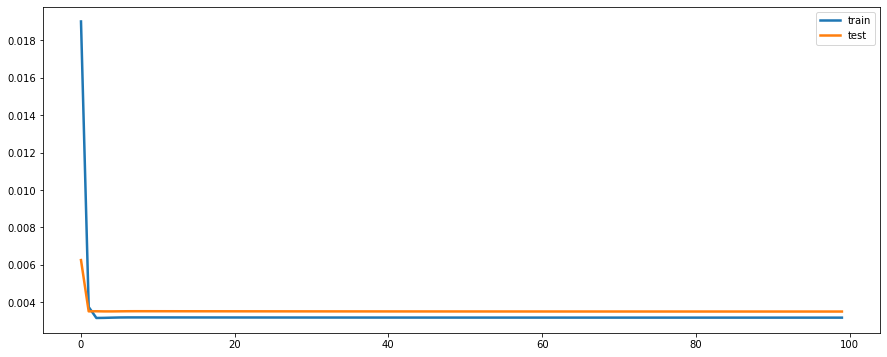

In [7]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

* **Prediction**

Notice that I only predict the price of the next day using the price today. Since there must be a lot of influence factors and it must have a lot of error when you predict a longer time.

In [8]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), -1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)




313/313 [==============================] - 1s 1ms/step


* **Visualising**

Plot the predicted price and the real price. Compare the diference. The difference is larger when the time is further to the training set. That is why I only want to predict the price of one month

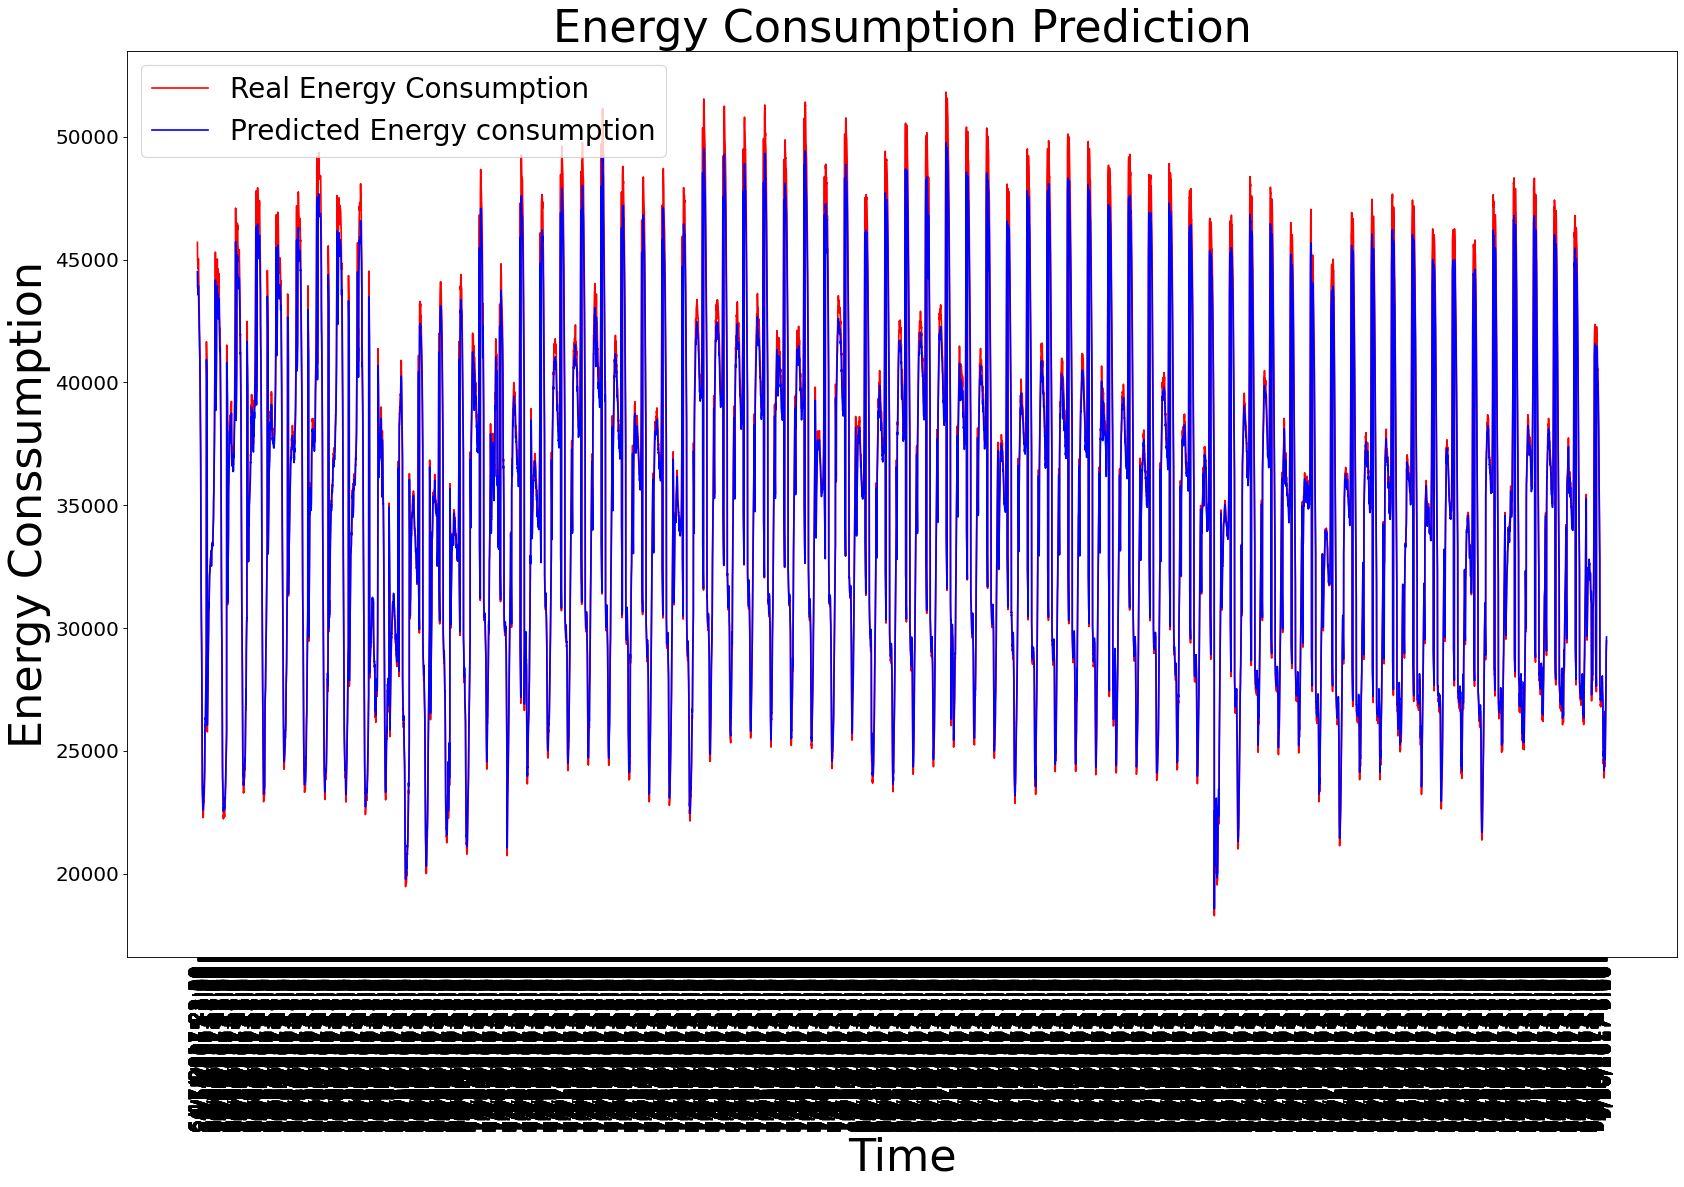

In [9]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real Energy Consumption')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted Energy consumption')
plt.title('Energy Consumption Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['DateTime']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Energy Conssumption', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [10]:
rmse = np.sqrt(mean_squared_error(test_set, predicted_BTC_price))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 613.0590038348851


In [11]:
# Tính toán MAPE 
mape = mean_absolute_percentage_error(test_set, predicted_BTC_price) * 100
print('MAPE:', mape, '%')

MAPE: 1.1488343160035184 %


**Thank you **